In [15]:
%load_ext autoreload
%autoreload 2

from committee_learning.initial_conditions import RandomNormalInitialConditions
from committee_learning.simulation import NormalizedSphericalConstraintSimulation
from committee_learning.result import SimulationResult, SquareODEResult
from committee_learning.ode import SphericalSquaredActivationODE
import numpy as np

d = 50000
p = 2
k = 1
gamma0 = .1
noise = 1e-3
log_time = 2.

# Big: 3 , small: 0, none: 4
id_list = [0,3,4,7]
# id_list = [5,6,7]



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


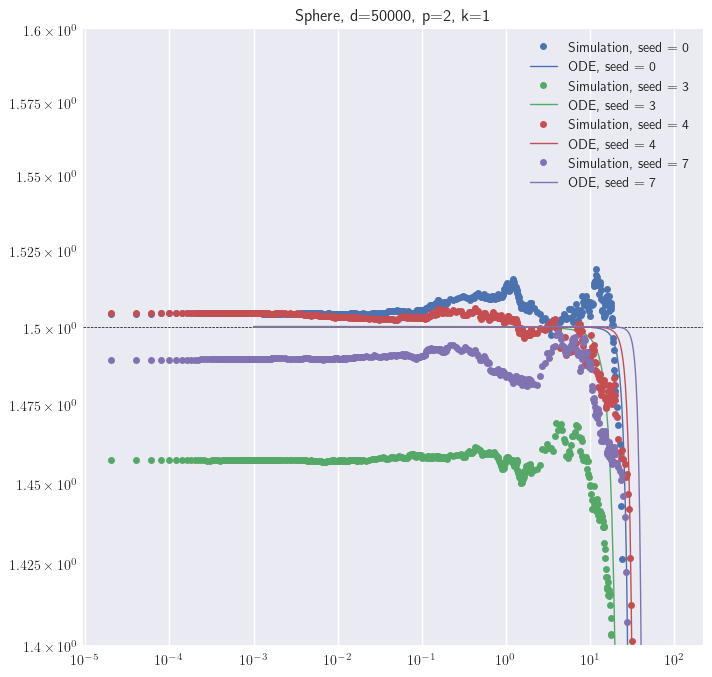

In [24]:
import matplotlib.pyplot as plt
from committee_learning.utilities import plot_style

simr = {}
with plot_style():
  fig, ax = plt.subplots(figsize=(8,8))
  ax.set_xscale('log')
  ax.set_yscale('log')
  # ax.set_xlim(20,1e2)
  ax.set_title(f'Sphere, d={d}, p={p}, k={k}')

  ax.axhline(1+1/p-2/d, lw=.5, ls='--',c='black')

  for id in id_list:
    ic = RandomNormalInitialConditions(p,k,d,spherical=True,seed=id)
    sim = NormalizedSphericalConstraintSimulation(d,p,k,noise,ic.Wteacher,gamma0,'square',ic.W0)
    simr[(p,d,id)] = SimulationResult(initial_condition=f'random-spherical',id=id)
    simr[(p,d,id)].from_file_or_run(sim,log_time+np.log10(sim.d),path='computation-database/sim/')

    t = np.array(simr[(p,d,id)].steps) / d

    ode = SphericalSquaredActivationODE(p,k,noise,gamma0,ic.P,ic.Q,ic.M,1e-3)
    oder = SquareODEResult(f'random-spherical-id{id}', id=id)
    oder.from_file_or_run(ode, int(log_time), path='computation-database/ode/',)

    sim_plot = ax.plot(t, simr[(p,d,id)].risks, label=f'Simulation, seed = {id}',ls='',lw=1.,marker='o',ms=5.)
    ax.plot(oder.times, oder.risks, label=f'ODE, seed = {id}',ls='-',lw=1.,marker='',color=sim_plot[0].get_color())
  ax.legend()
  # plt.show()

  ax.set_ylim(1.4,1.6)
  plt.show()


525


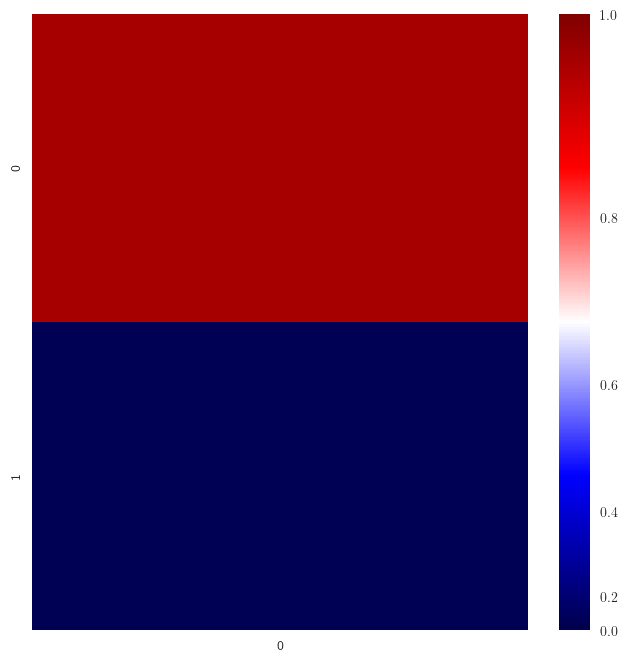

562


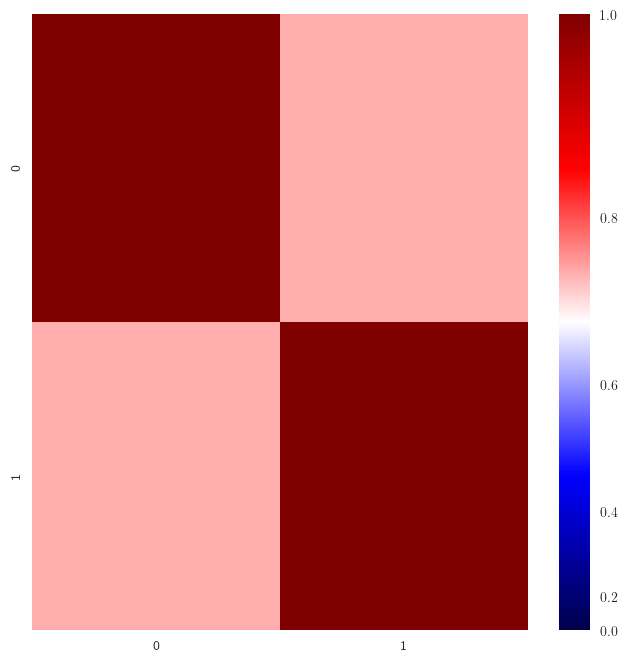

In [ ]:
from committee_learning.utilities import macroscopic_variable_plot

macroscopic_variable_plot(simr[(p,d,3)].M_at_time(40.))
macroscopic_variable_plot(simr[(p,d,3)].Q_at_time(70.))